# <center> CUSTOMER LIFETIME VALUE (CLV) ANALYSIS </center>

## 1) Introduction

Customer lifetime value helps you understand the growth and revenue value of each customer over time. This metric is important to any business because it can help your business:

    Boost customer loyalty

    Reduce churn

    Improve strategic decision-making

For example, you can use customer lifetime value to find the customer segments that are most valuable to your company.

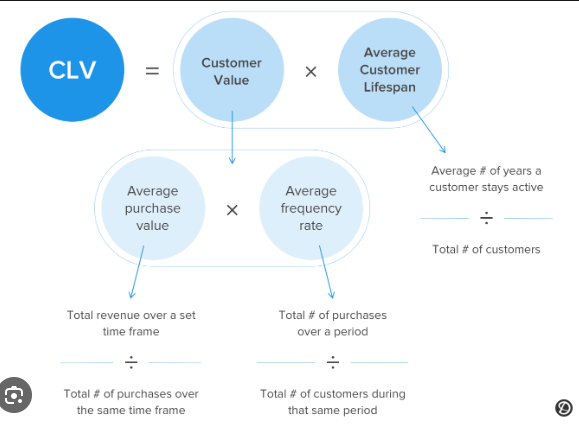

## 2) Package and data imports

In [54]:
# package imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [4]:
rfm= pd.read_csv('rfm_revised.csv')
rfm.head()

,Unnamed: 0,Customer ID,last_date,recency,rank_recency,frequency,freq_ranking,monetary,rank_monet,rec_freq_monet
0,0,12346.0,2011-01-18,325,0.710338,34,0.621068,6463.038333,0.001530,321
1,1,12347.0,2011-12-07,2,0.031202,222,0.153715,615.191250,0.106104,111
2,2,12348.0,2011-09-25,75,0.458085,51,0.505951,403.880000,0.263051,221
3,3,12349.0,2011-11-21,18,0.192229,175,0.197585,1107.172500,0.028567,111
4,4,12350.0,2011-02-02,310,0.699286,17,0.790342,334.400000,0.375446,231


In [6]:
retail= pd.read_csv('retail_clean.csv')
retail.head()

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


## 3) Data Cleaning

In [8]:
### splitting the columns
rfm['recency_groups']= rfm['rec_freq_monet'].astype('string').str.slice(0,1,1)
rfm['frequency_groups']= rfm['rec_freq_monet'].astype('string').str.slice(1,2,1)
rfm['monetary_groups']= rfm['rec_freq_monet'].astype('string').str.slice(2,3,1)

rfm.head()

,Unnamed: 0,Customer ID,last_date,recency,rank_recency,frequency,freq_ranking,monetary,rank_monet,rec_freq_monet,recency_groups,frequency_groups,monetary_groups
0,0,12346.0,2011-01-18,325,0.710338,34,0.621068,6463.038333,0.001530,321,3,2,1
1,1,12347.0,2011-12-07,2,0.031202,222,0.153715,615.191250,0.106104,111,1,1,1
2,2,12348.0,2011-09-25,75,0.458085,51,0.505951,403.880000,0.263051,221,2,2,1
3,3,12349.0,2011-11-21,18,0.192229,175,0.197585,1107.172500,0.028567,111,1,1,1
4,4,12350.0,2011-02-02,310,0.699286,17,0.790342,334.400000,0.375446,231,2,3,1


In [9]:
#converting into ordinal value
value_map= {'1':'3','3':'1','2':'2'}


rfm['recency_groups']= rfm['recency_groups'].map(value_map)
rfm['frequency_groups']= rfm['frequency_groups'].map(value_map)
rfm['monetary_groups']= rfm['monetary_groups'].map(value_map)

rfm.head()

,Unnamed: 0,Customer ID,last_date,recency,rank_recency,frequency,freq_ranking,monetary,rank_monet,rec_freq_monet,recency_groups,frequency_groups,monetary_groups
0,0,12346.0,2011-01-18,325,0.710338,34,0.621068,6463.038333,0.001530,321,1,2,3
1,1,12347.0,2011-12-07,2,0.031202,222,0.153715,615.191250,0.106104,111,3,3,3
2,2,12348.0,2011-09-25,75,0.458085,51,0.505951,403.880000,0.263051,221,2,2,3
3,3,12349.0,2011-11-21,18,0.192229,175,0.197585,1107.172500,0.028567,111,3,3,3
4,4,12350.0,2011-02-02,310,0.699286,17,0.790342,334.400000,0.375446,231,2,1,3


In [11]:
#calculating overall score
rfm['overall_score']= (rfm['recency_groups'].astype('int64')+rfm['frequency_groups'].astype('int64')+
                       rfm['monetary_groups'].astype('int64'))
rfm.head()

,Unnamed: 0,Customer ID,last_date,recency,rank_recency,frequency,freq_ranking,monetary,rank_monet,rec_freq_monet,recency_groups,frequency_groups,monetary_groups,overall_score
0,0,12346.0,2011-01-18,325,0.710338,34,0.621068,6463.038333,0.001530,321,1,2,3,6
1,1,12347.0,2011-12-07,2,0.031202,222,0.153715,615.191250,0.106104,111,3,3,3,9
2,2,12348.0,2011-09-25,75,0.458085,51,0.505951,403.880000,0.263051,221,2,2,3,7
3,3,12349.0,2011-11-21,18,0.192229,175,0.197585,1107.172500,0.028567,111,3,3,3,9
4,4,12350.0,2011-02-02,310,0.699286,17,0.790342,334.400000,0.375446,231,2,1,3,6


In [14]:
ltv = retail.groupby('Customer ID')['Revenue'].sum().reset_index()
ltv.head()

,Customer ID,Revenue
0,12346.0,77556.46
1,12347.0,4921.53
2,12348.0,2019.40
3,12349.0,4428.69
4,12350.0,334.40


<AxesSubplot:ylabel='Frequency'>

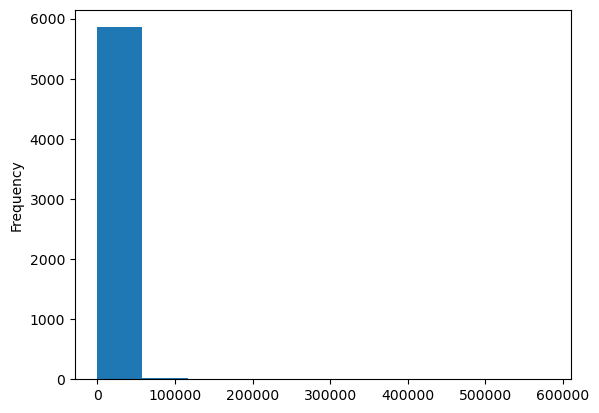

In [36]:
ltv.columns=['Customer ID', 'ltv']
ltv.ltv.plot(kind='hist')

<AxesSubplot:ylabel='ltv'>

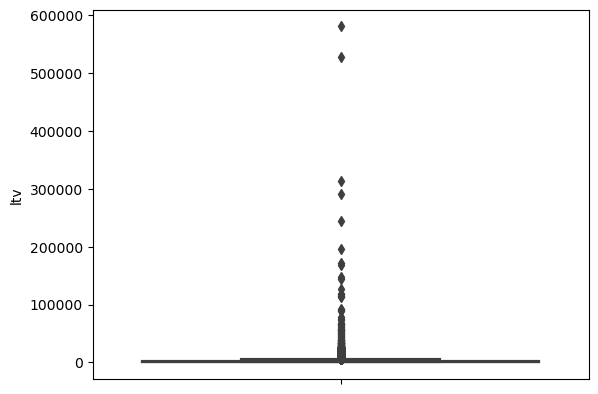

In [39]:
sns.boxplot(y='ltv',data=ltv)

#len(ltv)-len(outliers_removed)
outliers_removed = ltv[ltv.ltv <= ltv.ltv.quantile(0.99)]

sns.boxplot(y='ltv',data=outliers_removed)

# 3) Customer Segmentation

In [43]:
km = KMeans(n_clusters=3, n_init=10, max_iter=300)

In [44]:
fitting=km.fit_predict(outliers_removed[['ltv']])

In [47]:
outliers_removed['clusters']=fitting

outliers_removed.groupby('clusters')['ltv'].mean()

outliers_removed['clusters']=outliers_removed['clusters'].astype('string')

ltv_mapping= {'0':'Low_ltv','1': 'Mid_ltv','2':'High_ltv'}

outliers_removed['clusters']=outliers_removed['clusters'].map(ltv_mapping)


rfm.columns

C:\Users\Dell\AppData\Local\Temp\ipykernel_49784\1767110548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_removed['clusters']=fitting
C:\Users\Dell\AppData\Local\Temp\ipykernel_49784\1767110548.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_removed['clusters']=outliers_removed['clusters'].astype('string')
C:\Users\Dell\AppData\Local\Temp\ipykernel_49784\1767110548.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

Index(['Unnamed: 0', 'Customer ID', 'last_date', 'recency', 'rank_recency',
       'frequency', 'freq_ranking', 'monetary', 'rank_monet', 'rec_freq_monet',
       'recency_groups', 'frequency_groups', 'monetary_groups',
       'overall_score'],
      dtype='object')

In [49]:
fm_data= rfm.loc[:,['Customer ID','recency','frequency','monetary','recency_groups',
                     'frequency_groups', 'monetary_groups','overall_score']]

fm_data.head()

,Customer ID,recency,frequency,monetary,recency_groups,frequency_groups,monetary_groups,overall_score
0,12346.0,325,34,6463.038333,1,2,3,6
1,12347.0,2,222,615.191250,3,3,3,9
2,12348.0,75,51,403.880000,2,2,3,7
3,12349.0,18,175,1107.172500,3,3,3,9
4,12350.0,310,17,334.400000,2,1,3,6


In [51]:
rfm_data= rfm.loc[:,['Customer ID','recency','frequency','monetary','recency_groups',
                     'frequency_groups', 'monetary_groups','overall_score']]

rfm_data.head()

,Customer ID,recency,frequency,monetary,recency_groups,frequency_groups,monetary_groups,overall_score
0,12346.0,325,34,6463.038333,1,2,3,6
1,12347.0,2,222,615.191250,3,3,3,9
2,12348.0,75,51,403.880000,2,2,3,7
3,12349.0,18,175,1107.172500,3,3,3,9
4,12350.0,310,17,334.400000,2,1,3,6


In [52]:
joined_data= pd.merge(outliers_removed[['Customer ID','clusters']],rfm_data,
                      how='left',on= 'Customer ID')
joined_data.drop('Customer ID',axis=1,inplace=True)

joined_data.head()

,clusters,recency,frequency,monetary,recency_groups,frequency_groups,monetary_groups,overall_score
0,High_ltv,2,222,615.19125,3,3,3,9
1,Low_ltv,75,51,403.88000,2,2,3,7
2,High_ltv,18,175,1107.17250,3,3,3,9
3,Low_ltv,310,17,334.40000,2,1,3,6
4,Low_ltv,375,21,300.93000,1,1,2,4


In [55]:
X_1= pd.get_dummies(joined_data.drop('clusters',axis=1))
columns=X_1.columns
X=X_1.values

y= joined_data['clusters'].values

In [56]:
model_tree= DecisionTreeClassifier()

In [57]:
cv= RepeatedStratifiedKFold(n_splits=3,n_repeats=3,random_state=1)

In [58]:
scores= cross_val_score(model_tree,X,y,scoring='accuracy',cv=cv)

scores.mean()

0.8610443949901239

In [60]:
param_dist = {"max_depth": [3, None],
          
           "min_samples_leaf": range(1,9),
             "criterion": ["gini", "entropy"]}

In [61]:
tree= DecisionTreeClassifier()
rf= RandomForestClassifier()

tree_cv= RandomizedSearchCV(tree,param_dist,cv=5)
rf_cv= RandomizedSearchCV(rf, param_dist,cv=5)

In [62]:
tree_cv.fit(X,y)

rf_cv.fit(X,y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'min_samples_leaf': range(1, 9)})

In [63]:
print(tree_cv.best_score_)

print(rf_cv.best_score_)

0.8929902806660472
0.8988325000368714


In [64]:
prediction=rf_cv.predict(X)

In [65]:
comparison_data= pd.DataFrame({'Actual': y,'Prediction':prediction})

In [66]:
comparison_data.groupby(['Actual','Prediction'])['Actual','Prediction'].count()

C:\Users\Dell\AppData\Local\Temp\ipykernel_49784\1429330830.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  comparison_data.groupby(['Actual','Prediction'])['Actual','Prediction'].count()


Actual  Prediction
Actual   Prediction                    
High_ltv High_ltv       574         574
         Low_ltv        205         205
         Mid_ltv         12          12
Low_ltv  High_ltv        94          94
         Low_ltv       4759        4759
         Mid_ltv          1           1
Mid_ltv  High_ltv        73          73
         Low_ltv         25          25
         Mid_ltv         79          79